# Background
A company engaged in online retail shipping, want to maximize company performance so that customer satisfaction can be increased. this company employs **data analyst** to analyze its company. This company delivers goods that have been ordered in their online application, similar to the "**Tokopedia**" in Indonesia.

# Problem Statement
The dataset given by an international e-commerce company who wants to discover key insights from their customer database. They want to know what was the caused on late delivery time.

# Data
To answer the questions above, we will analyze participant data that has been collected by the company. Dataset can be accessed [here](https://drive.google.com/drive/folders/1qDcYH_h5-7v6Z9h6MlWiEC8wtY7TFp9Z). 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats



import warnings
warnings.filterwarnings("ignore")

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:  

- **ID**: ID number of customers.
- **Warehouse block**: The company has a big warehouse that is divided into blocks (A-E).
- **Mode of shipment**: The company ships the products in multiple ways (Ship, Flight, and
Road).
- **Customer care calls**: The number of calls made from inquiries for inquiries of the
shipment.
- **Customer rating**: Rate from each customer. 1 is the lowest, and 5 is the highest.
- **Cost of the product**: Cost of the product in US Dollars.
- **Prior purchases**: The number of previous purchases.
- **Product importance**: The company has categorized the product in various parameters
(low, medium, high).
- **Gender**: Male and female.
- **Discount offered**: Discount offered on that specific product.
- **Weight in gms**: The weight in grams.
- **Reached on time**: 1 indicates that the product has not arrived on time, and 0 indicates the
product has arrived on time.

### Here are the top and bottom 5 rows from the Online Retail Shipping dataset.

In [66]:
df=pd.read_csv('Online retail shipping.csv')
display(df.head(),df.tail())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


# Data Understanding and Cleaning
Before getting into the analysis, we need to get to know our dataset further in the data understanding stage. From this process, we will know what anomalies are in our dataset and need to be handled in the data cleaning stage. Every anomaly handler that is carried out will be accompanied by justification for the steps taken, both in domain knowledge and statistically.

First, let's look at the information from the Online Retail Shipping dataset.

In [67]:
print(f'The number of rows and columns in the df dataset is {df.shape}')
df.info()

The number of rows and columns in the df dataset is (10999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [68]:
df.nunique()

ID                     10999
Warehouse_block        5    
Mode_of_Shipment       3    
Customer_care_calls    6    
Customer_rating        5    
Cost_of_the_Product    215  
Prior_purchases        8    
Product_importance     3    
Gender                 2    
Discount_offered       65   
Weight_in_gms          4034 
Reached.on.Time_Y.N    2    
dtype: int64

Checking missing values

In [69]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Checking duplicated rows

In [70]:
df.duplicated().sum()

0

Column **“ID”** is just index number of rows, since we don’t need this column, we can delete this column

In [71]:
df = df.drop(columns='ID')

Checking Outliers (only Prior purchase and Discount offered because only those 2 columns have outliers)

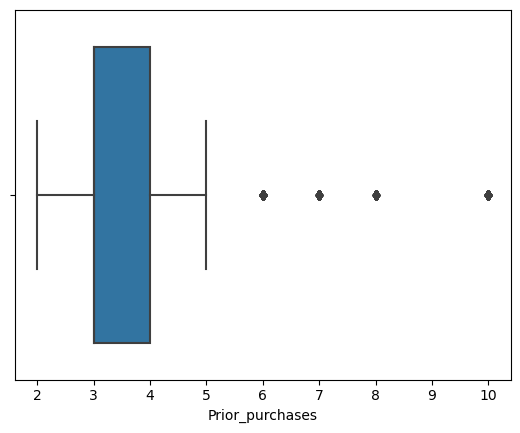

In [72]:
sns.boxplot(x=df['Prior_purchases'])
plt.show()

- The outliers is above 5 on prior purhcases

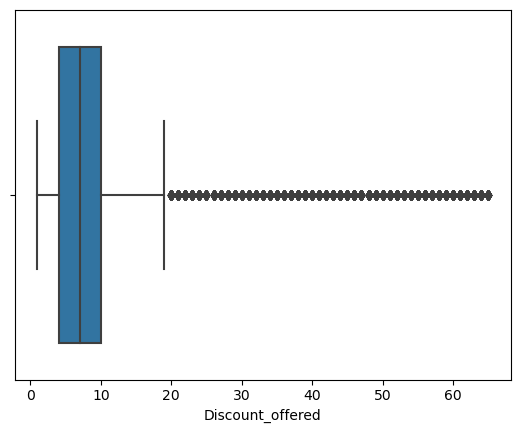

In [73]:
sns.boxplot(x=df['Discount_offered'])
plt.show()

- The outliers is above ±20% on discount offered

Changing the value 'F' in column warehouse_block to 'E'

In [74]:
df['Warehouse_block'] = df['Warehouse_block'].replace('F','E')

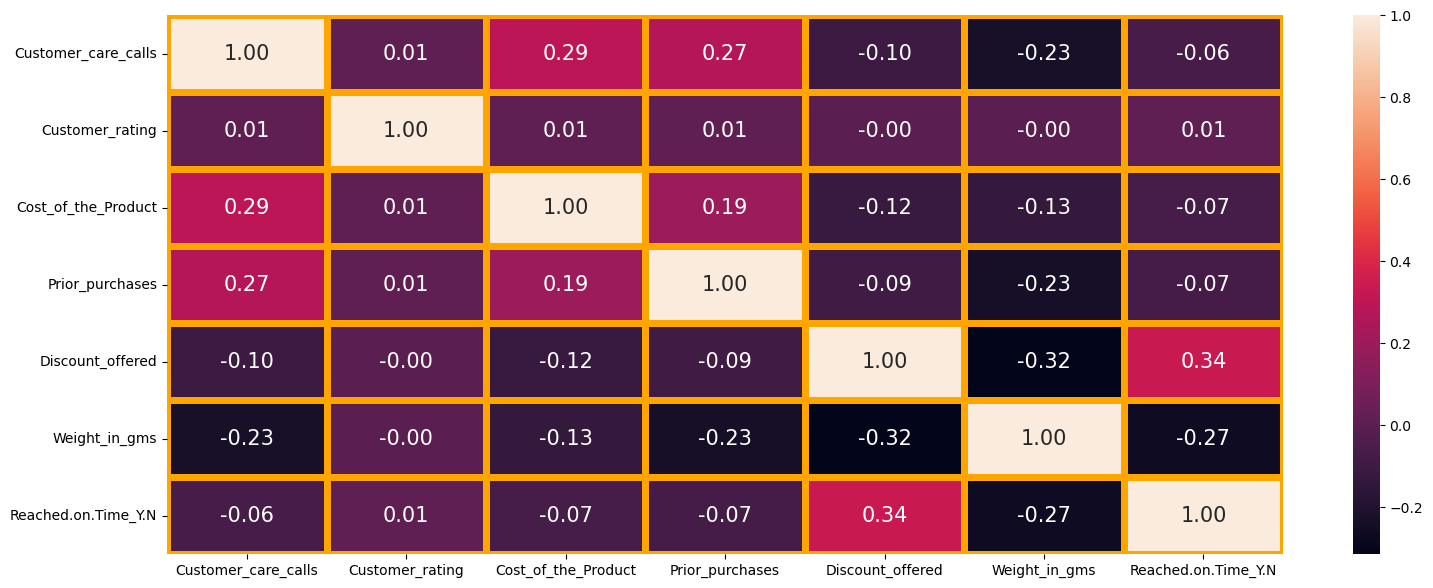

In [75]:
# heatmap to check correlation between feature and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(method='spearman'), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange')
plt.show()

Conclusions from Correlation matrix :

- **Discount Offered** have high positive correlation with **Reached.on.Time_Y.N** of 34%.
- **Weights in gram** have negative correlation with **Reached.on.Time_Y.N** -27%.
- **Discount Offered** and **weights in grams** have negative correlation -32%.
- **Customer care calls** and **weights in grams** have negative correlation -23%.
- **Customer care calls** and **cost of the product** have positive correlation of 29%.
- **Prior Purchases** and **Customer care calls** have positive correlation 27%.

In [76]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,E,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [77]:
# Descriptive statistics
display(df.describe(), df.describe(include='object'))

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,E,Ship,low,F
freq,3666,7462,5297,5545


In [78]:
pd.set_option('display.max_colwidth', -1)
# unique data in each columns
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Warehouse_block,5,"[D, E, A, B, C]"
1,Mode_of_Shipment,3,"[Flight, Ship, Road]"
2,Customer_care_calls,6,"[4, 2, 3, 5, 6, 7]"
3,Customer_rating,5,"[2, 5, 3, 1, 4]"
4,Cost_of_the_Product,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
5,Prior_purchases,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
6,Product_importance,3,"[low, medium, high]"
7,Gender,2,"[F, M]"
8,Discount_offered,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"
9,Weight_in_gms,4034,"[1233, 3088, 3374, 1177, 2484, 1417, 2371, 2804, 1861, 1187, 2888, 3253, 3667, 2602, 1009, 2707, 1194, 3952, 2495, 1059, 1521, 2899, 1750, 3922, 3561, 3496, 1066, 1435, 3134, 3819, 2741, 3341, 3795, 3261, 2460, 1811, 1477, 3605, 3905, 2383, 3798, 1265, 1647, 1556, 1328, 2944, 1245, 1576, 3753, 2146, 2042, 1735, 1320, 1128, 3539, 2437, 3096, 3453, 1367, 1923, 2794, 1158, 1292, 1880, 3045, 2881, 1710, 1878, 2512, 2929, 3849, 2229, 2998, 3984, 2442, 3775, 1788, 1518, 3959, 3711, 1942, 1759, 2875, 1364, 2710, 2148, 2910, 2974, 2339, 3880, 1085, 3163, 1188, 3387, 2343, 2034, 1225, 2401, 1104, 1617, ...]"


In [79]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#### Some insight that we get from summary are:

1. Most of goods are shipped from warehouse block E
1. Most of goods are shipped by ship
1. Average customers make 4 calls
1. The average of ratings are 2.99
1. Most of goods are low priority
1. Female customers more slightly than male customers
1. The average of discounts are 13%
1. The average of good weights are 3.63 kg
1. Most of the delivery is late

# Exploratory Data Analysis (EDA)

### Categorical

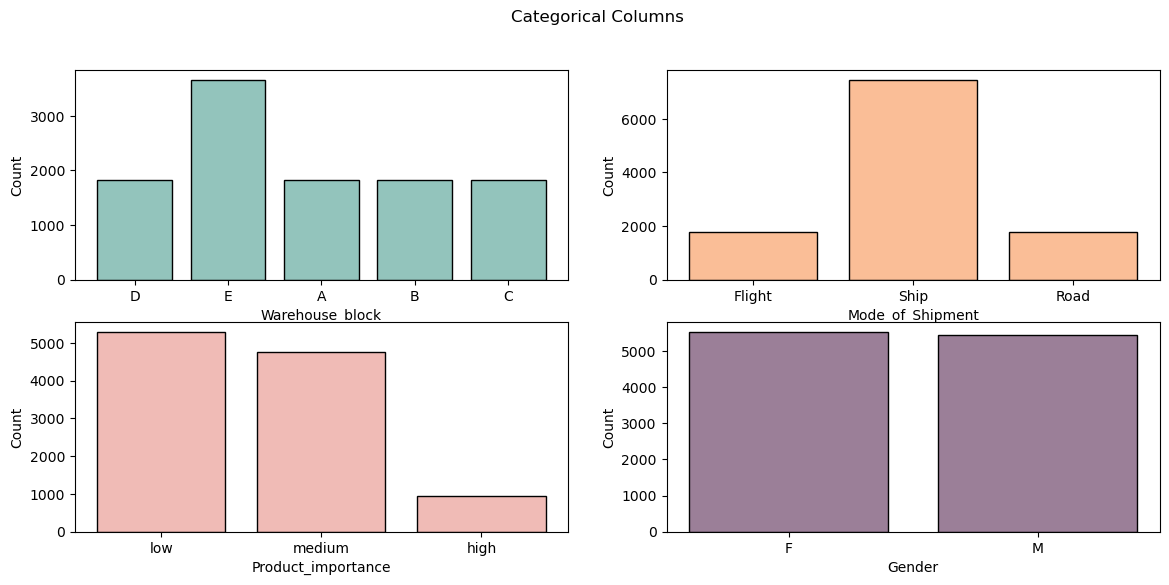

In [92]:
# Define colors
pal = ['#6FB0A6', '#F9A875', '#EBA59E', '#7A5476']

# Display class repartitions
plt.figure(figsize=(14, 6))

cat_features = df.select_dtypes('object').columns.values

for i, cat in enumerate(cat_features):

    plt.subplot(2, 2, i+1)
    sns.histplot(df[cat], shrink=0.8, color=pal[i])

plt.suptitle('Categorical Columns \n')
plt.show()


- **Warehouse**: Blocks A, B, C, D are equilibrated while block E is predominent (1/2 ratio).
- **Shipment**: Flight and Road have similar observations while Ship is predominent (1/4 ratio).
- **Importance**: There is a majority of low and medium importances and a minority of high importances.
- **Genders**: Both classes are balanced.

### Numerical

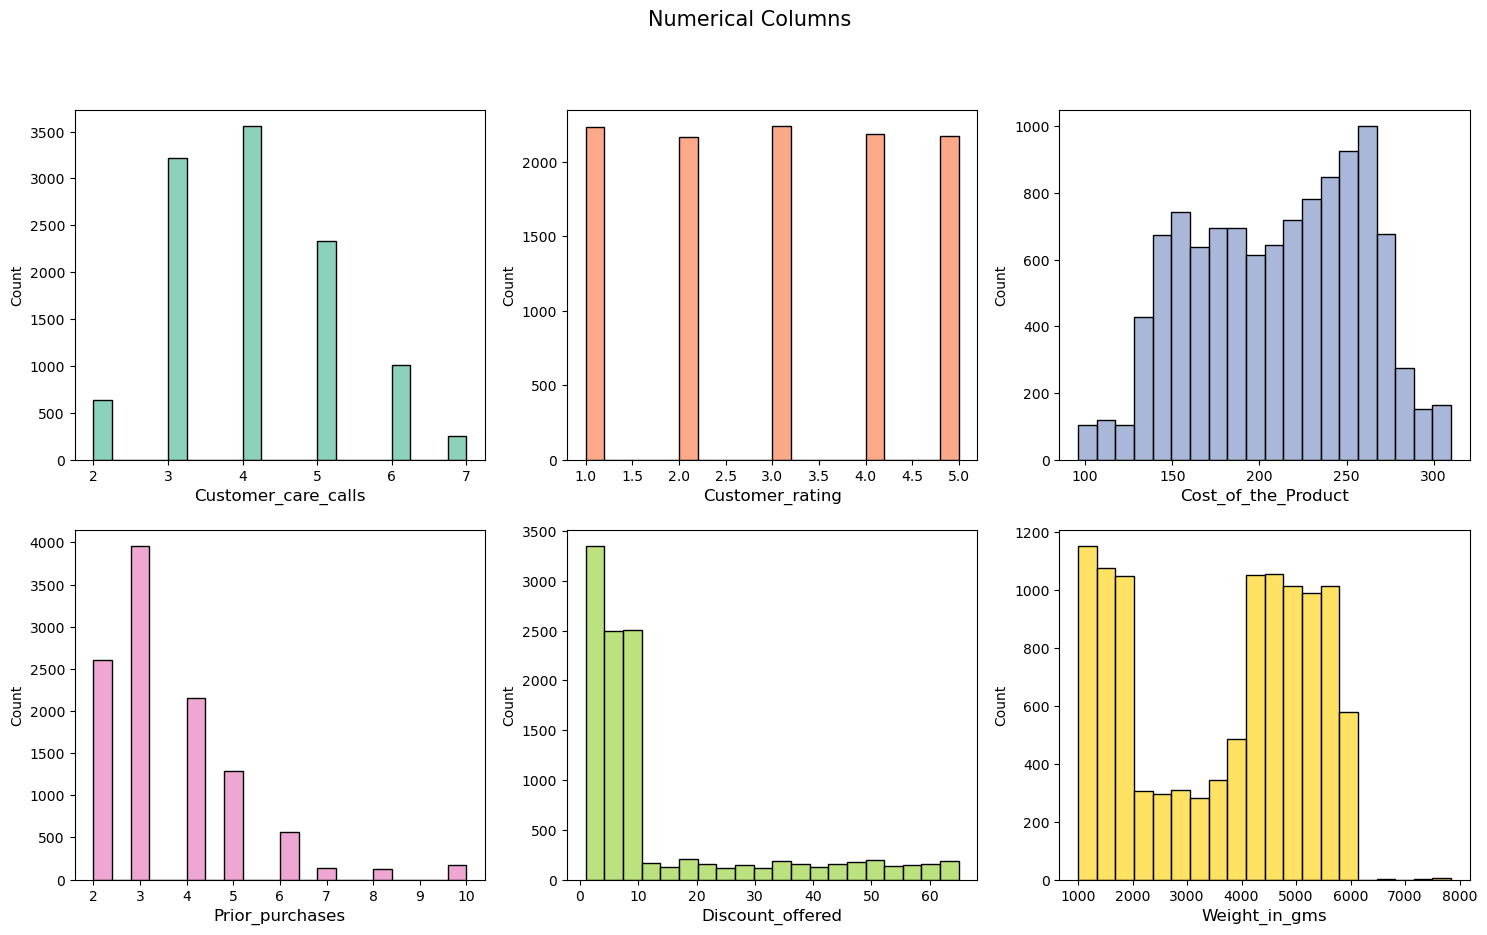

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

num_features = df.select_dtypes('number').drop('Reached.on.Time_Y.N', axis=1).columns.values
pal = sns.color_palette('Set2', len(num_features))

for i, num in enumerate(num_features):

    plt.subplot(2, 3, i+1)
    sns.histplot(df[num], bins=20, color=pal[i])
    plt.xlabel(num, fontsize=12)
    
plt.suptitle('Numerical Columns\n',
          fontsize = 15)
plt.show()


- **Care Calls**: Slight positive skewed normal distribution with mode at 4.
- **Customer Rating**: Uniform distribution.
- **Costs**: 2 picks: smallest around 150, highest around 250.
- **Prior Purchases**: Positive skewed normal distribution, mode at 3.
- **Discount offered**: Separated into 2 uniform distributions: 0 to 10 is predominent and then small amount from 10 to 65.
- **Weight**: 3 zones: high from 1000 to 2000 and from 4000 to 6000. Low from 2000 to 4000.

## **Exploring relation of categorical columns with reached on time or not**

In [ ]:
# creating a list of categorical columns

object_columns = df.select_dtypes(include = ['object'])
object_columns.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

### **Warehouse_block**

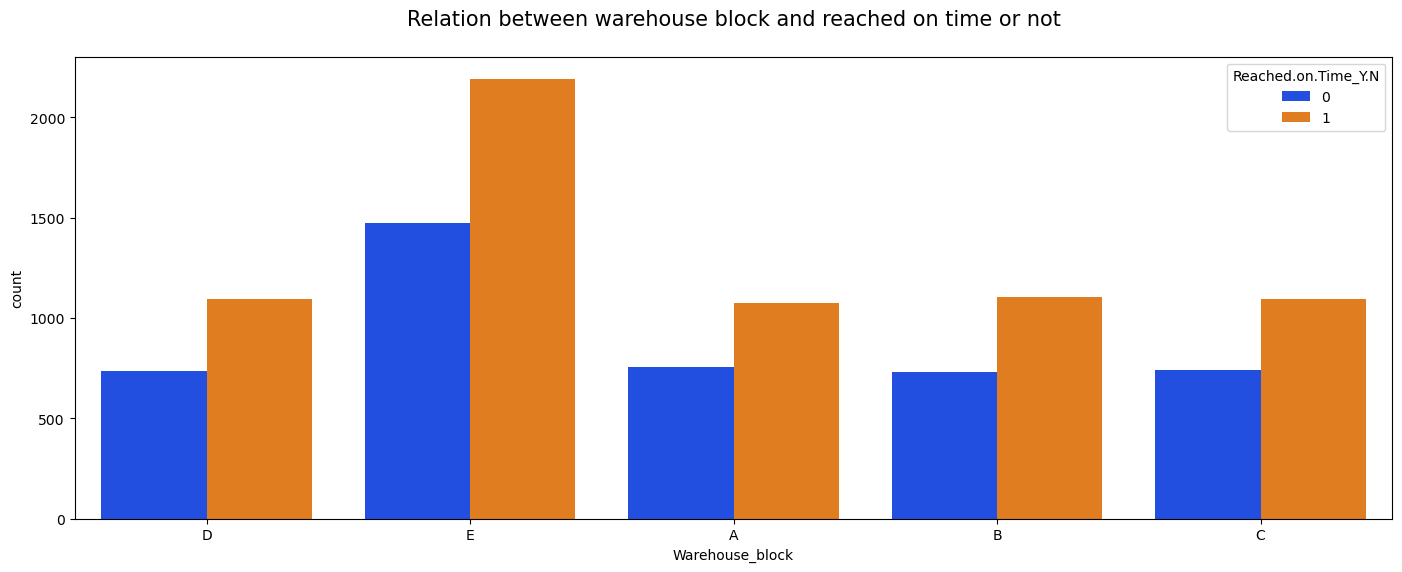

In [ ]:
# making a countplot of warehouse block column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Warehouse_block', hue = 'Reached.on.Time_Y.N', data = df, palette='bright')
plt.title('Relation between warehouse block and reached on time or not\n',
          fontsize = 15)
plt.show()

In [ ]:
# create crosstab between Warehouse block and reached on time columns
crosstab = pd.crosstab(df['Warehouse_block'], df['Reached.on.Time_Y.N'])

# interpret chi-square test
stat, pvalue, dof, expected = chi2_contingency(crosstab)
if pvalue < 0.05:
    print('P-value is less than 0.05, reject null hypothesis.')
    print('There is a significant association between Warehouse block and Reached on Time.')
else:
    print('P-value is greater than 0.05, fail to reject null hypothesis.')
    print('There is no significant association between Warehouse block and Reached on Time.')


P-value is greater than 0.05, fail to reject null hypothesis.
There is no significant association between Warehouse block and Reached on Time.


### **Gender**

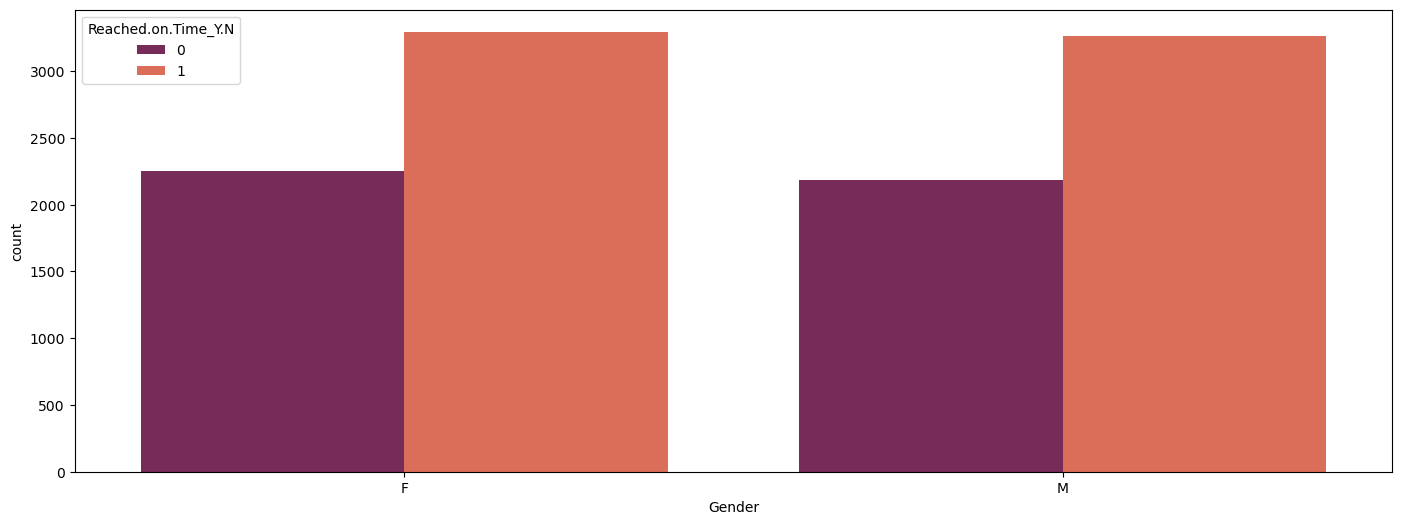

In [ ]:
# making a countplot of gender column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Gender', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()


### **Mode_of_Shipment**

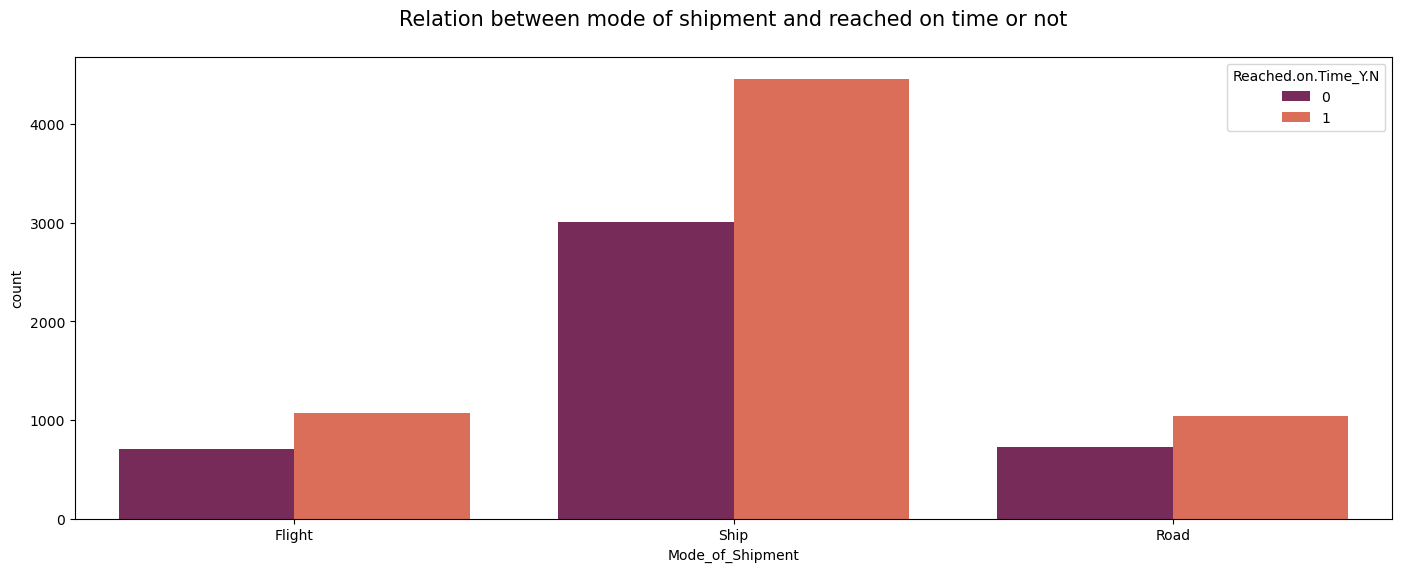

In [ ]:
# making a countplot of mode of shipment column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Mode_of_Shipment', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.title('Relation between mode of shipment and reached on time or not\n',
          fontsize = 15)
plt.show()

Chi-square Test

In [ ]:


# create crosstab between mode of shipment and reached on time columns
crosstab = pd.crosstab(df['Mode_of_Shipment'], df['Reached.on.Time_Y.N'])

# interpret chi-square test
stat, pvalue, dof, expected = chi2_contingency(crosstab)
if pvalue < 0.05:
    print('P-value is less than 0.05, reject null hypothesis.')
    print('There is a significant association between Mode of Shipment and Reached on Time.')
else:
    print('P-value is greater than 0.05, fail to reject null hypothesis.')
    print('There is no significant association between Mode of Shipment and Reached on Time.')


P-value is greater than 0.05, fail to reject null hypothesis.
There is no significant association between Mode of Shipment and Reached on Time.


### **Product_importance**

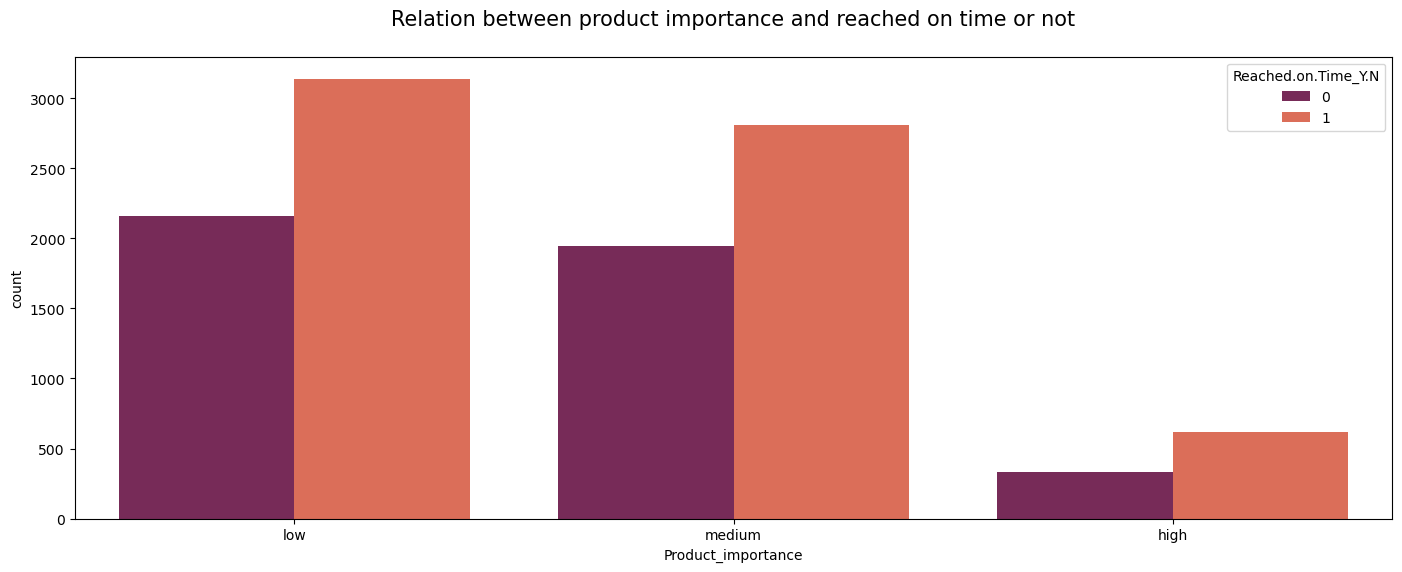

In [ ]:
# making a countplot of product importance column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Product_importance', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.title('Relation between product importance and reached on time or not\n',
          fontsize = 15)
plt.show()

In [ ]:
# Chi-square Test

# create crosstab between product importance and reached on time columns
crosstab = pd.crosstab(df['Product_importance'], df['Reached.on.Time_Y.N'])

# interpret chi-square test
stat, pvalue, dof, expected = chi2_contingency(crosstab)
if pvalue < 0.05:
    print('P-value is less than 0.05, reject null hypothesis.')
    print('There is a significant association between Product Importance and Reached on Time.')
else:
    print('P-value is greater than 0.05, fail to reject null hypothesis.')
    print('There is no significant association between Product Importance and Reached on Time.')


P-value is less than 0.05, reject null hypothesis.
There is a significant association between Product Importance and Reached on Time.


In [ ]:
# creating a list of continuous columns

integer_columns = df.select_dtypes(include = ['int64'])
integer_columns.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## **Exploring relation of continuous columns with reached on time or not**

### **Customer_care_calls**

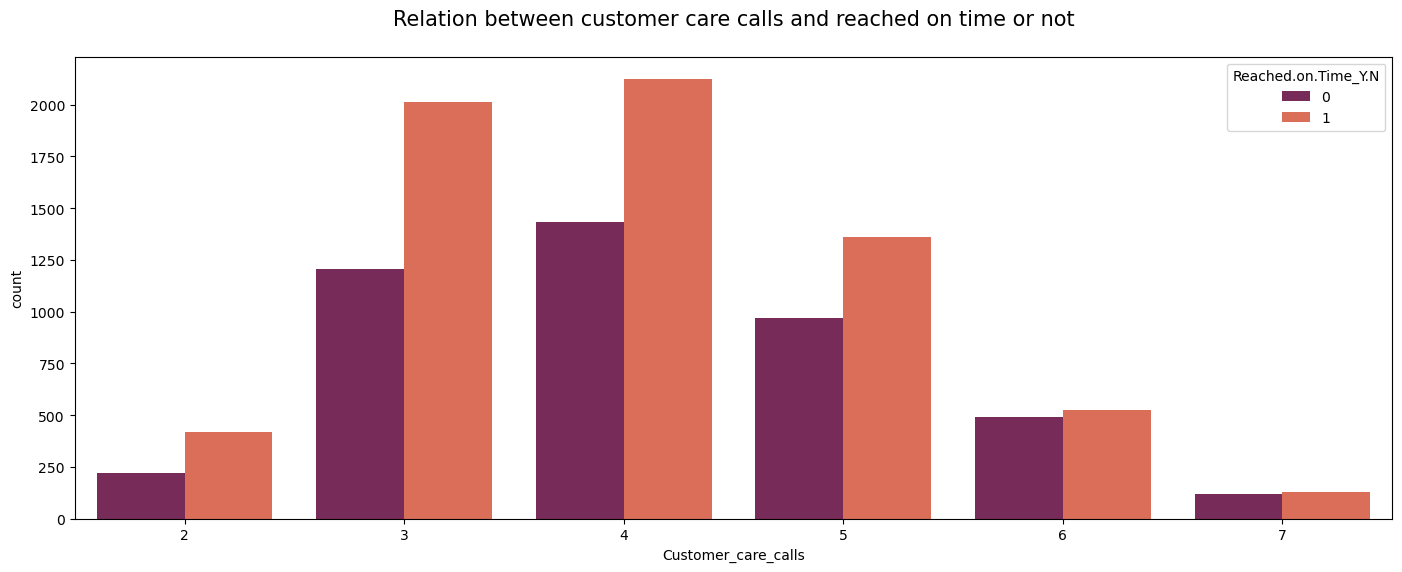

In [ ]:
# making a countplot of customer care calls column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.title('Relation between customer care calls and reached on time or not\n',
          fontsize = 15)
plt.show()

- The difference in ratio of "Reached.on.Time_Y.N" is smaller when there are more calls from customers, meaning that employees will work if triggered by a customer requesting the item.

In [ ]:
# Chi-square Test

# create crosstab between Customer care calls and reached on time columns
crosstab = pd.crosstab(df['Customer_care_calls'], df['Reached.on.Time_Y.N'])

# interpret chi-square test
stat, pvalue, dof, expected = chi2_contingency(crosstab)
if pvalue < 0.05:
    print('P-value is less than 0.05, reject null hypothesis.')
    print('There is a significant association between Customer care calls and Reached on Time.')
else:
    print('P-value is greater than 0.05, fail to reject null hypothesis.')
    print('There is no significant association between Customer care calls and Reached on Time.')

P-value is less than 0.05, reject null hypothesis.
There is a significant association between Customer care calls and Reached on Time.


### **Customer_rating**



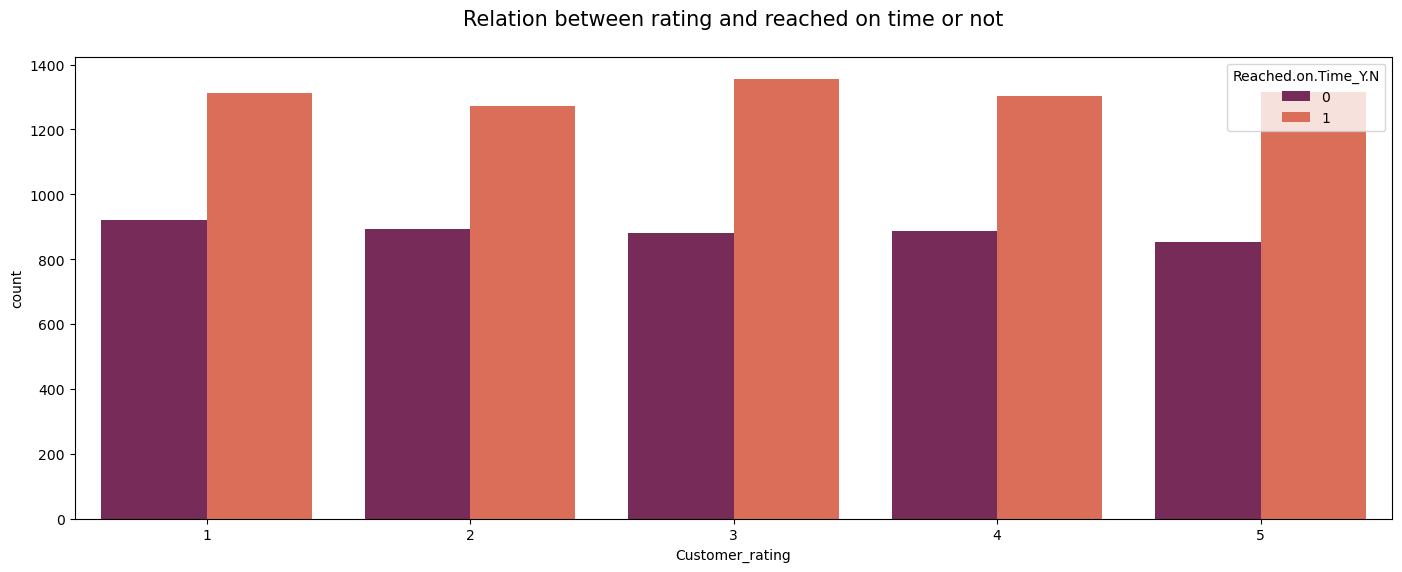

In [96]:
# making a countplot of customer ratings calls column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Customer_rating', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.title('Relation between rating and reached on time or not\n',
          fontsize = 15)
plt.show()

In [ ]:
# Chi-square Test

# create crosstab between Customer rating and reached on time columns
crosstab = pd.crosstab(df['Customer_rating'], df['Reached.on.Time_Y.N'])

# interpret chi-square test
stat, pvalue, dof, expected = chi2_contingency(crosstab)
if pvalue < 0.05:
    print('P-value is less than 0.05, reject null hypothesis.')
    print('There is a significant association between Customer rating calls and Reached on Time.')
else:
    print('P-value is greater than 0.05, fail to reject null hypothesis.')
    print('There is no significant association between Customer rating calls and Reached on Time.')

P-value is greater than 0.05, fail to reject null hypothesis.
There is no significant association between Customer rating calls and Reached on Time.


### **Prior_purchases**

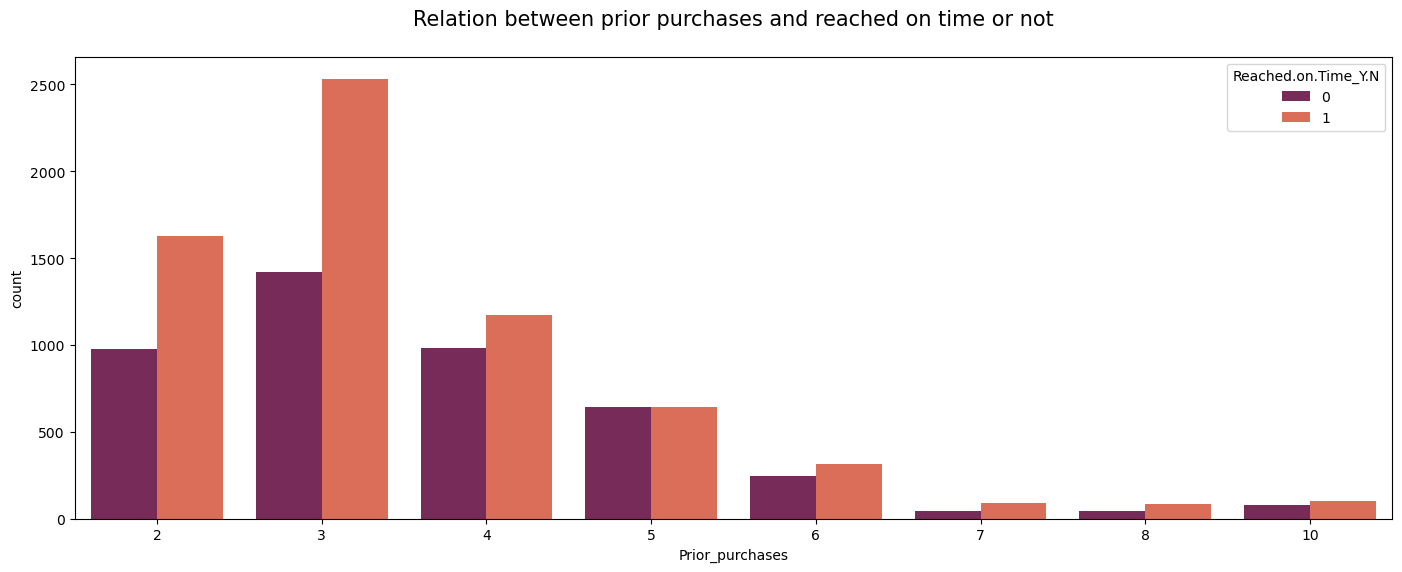

In [97]:
# making a countplot of prior purchases column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot('Prior_purchases', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.title('Relation between prior purchases and reached on time or not\n',
          fontsize = 15)
plt.show()

### **Cost_of_the_Product**

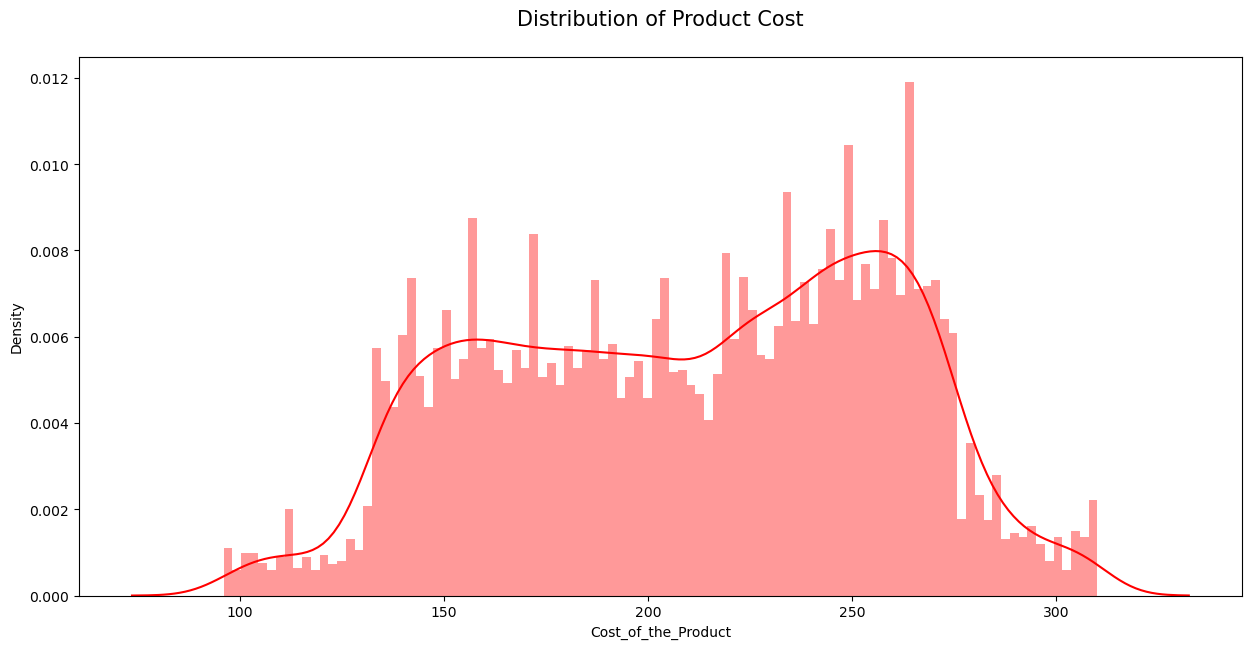

In [98]:
# making a distplot of cost of the product column

plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Cost_of_the_Product'], bins = 100, color = 'r')
plt.title('Distribution of Product Cost\n',
          fontsize = 15)
plt.show()

In [111]:
# looking at the relation between cost of the product and whether the product reached on time or not using boxplot

px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Cost_of_the_Product', 
       color = 'Reached.on.Time_Y.N', template = 'ggplot2')

### **Discount_offered**

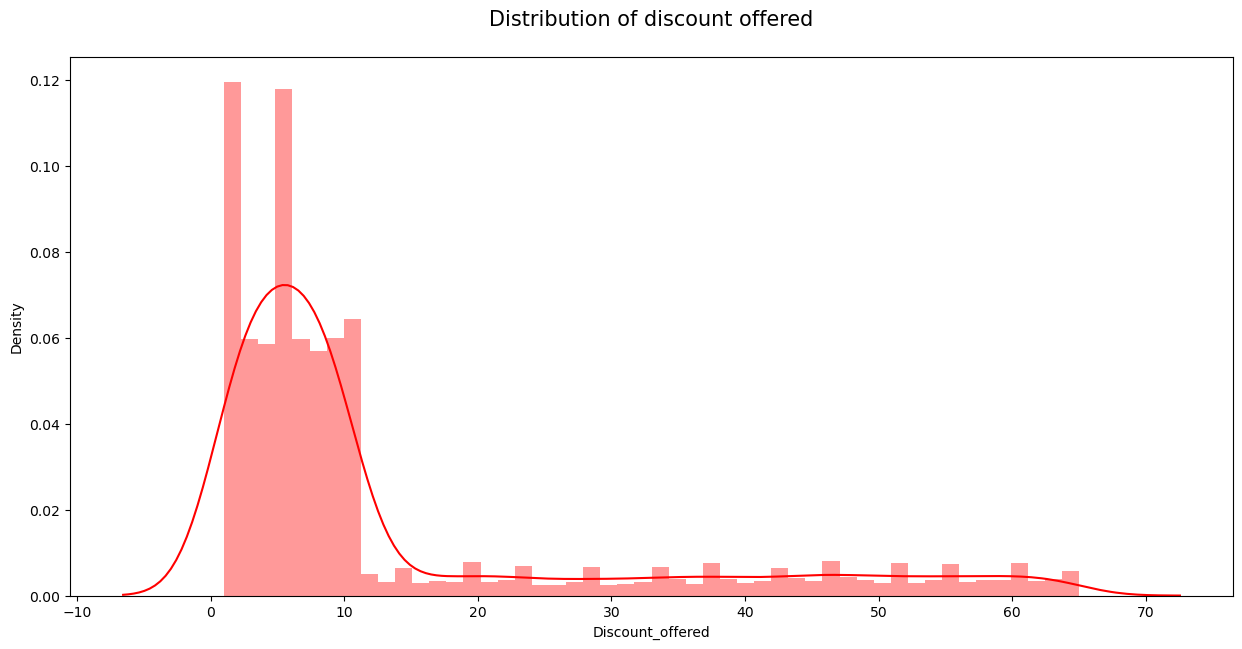

In [105]:
# making a distplot of discount offered column

plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Discount_offered'], color = 'r')
plt.title('Distribution of discount offered\n',
          fontsize = 15)
plt.show()

In [110]:
# looking at the relation between discount offered and whether the product reached on time or not using boxplot

px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Discount_offered', 
       color = 'Reached.on.Time_Y.N', template = 'ggplot2')

### **Weight in Grams**

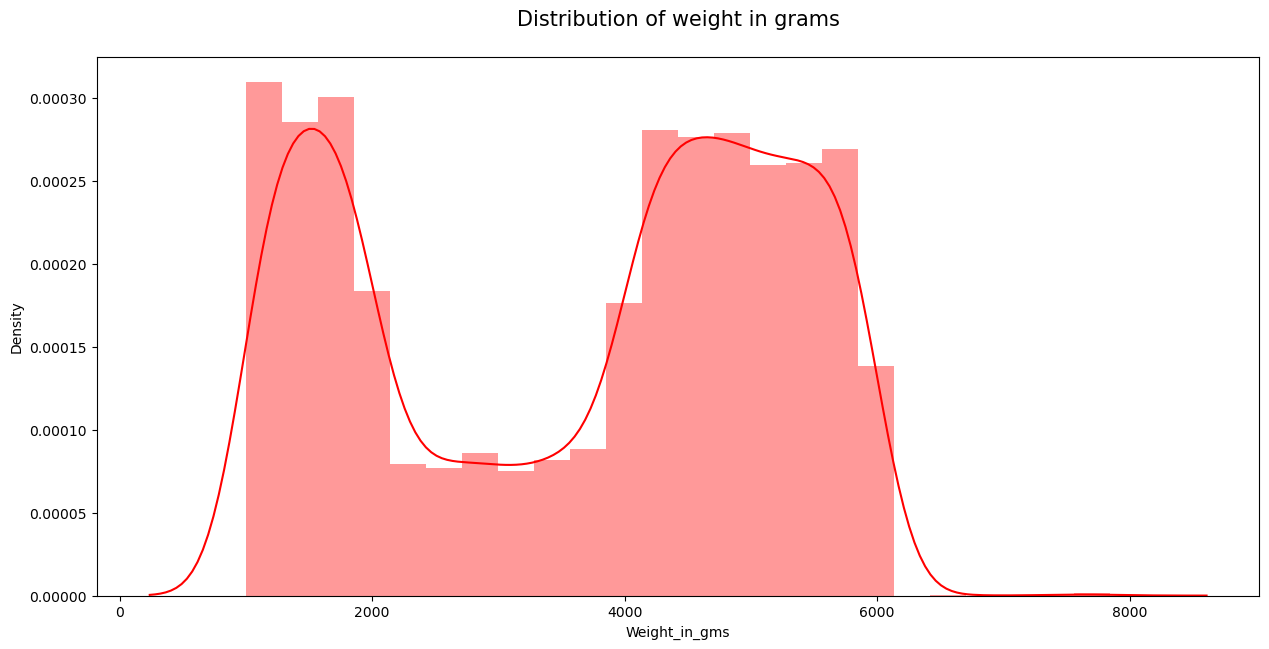

In [107]:
# making a distplot of weight in grams column

plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Weight_in_gms'], color = 'r')
plt.title('Distribution of weight in grams\n',
          fontsize = 15)
plt.show()

In [109]:
# looking at the relation between weights in grams and whether the product reached on time or not using boxplot\

px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', 
       color = 'Reached.on.Time_Y.N', template = 'ggplot2')

## **Other Possible Related Columns**

### Effect of Warehouse on Cost_of_Product

In [ ]:
# creating a dataframe of warehouse block and cost of the product columns 

warehouse_weight = df.groupby(['Warehouse_block'])['Cost_of_the_Product'].sum().reset_index()
warehouse_weight

,Warehouse_block,Cost_of_the_Product
0,A,382671
1,B,388888
2,C,387114
3,D,386805
4,E,766477


- Products from warehouse E have the high costs

In [ ]:
# Chi-square Test

# create crosstab between Warehouse block and reached on time columns
crosstab = pd.crosstab(df['Warehouse_block'], df['Reached.on.Time_Y.N'])

# interpret chi-square test
stat, pvalue, dof, expected = chi2_contingency(crosstab)
if pvalue < 0.05:
    print('P-value is less than 0.05, reject null hypothesis.')
    print('There is a significant association between Warehouse block and Reached on Time.')
else:
    print('P-value is greater than 0.05, fail to reject null hypothesis.')
    print('There is no significant association between Warehouse block and Reached on Time.')


P-value is greater than 0.05, fail to reject null hypothesis.
There is no significant association between Warehouse block and Reached on Time.


### Relation between Customer Care Calls and Customer Rating of Males and Females

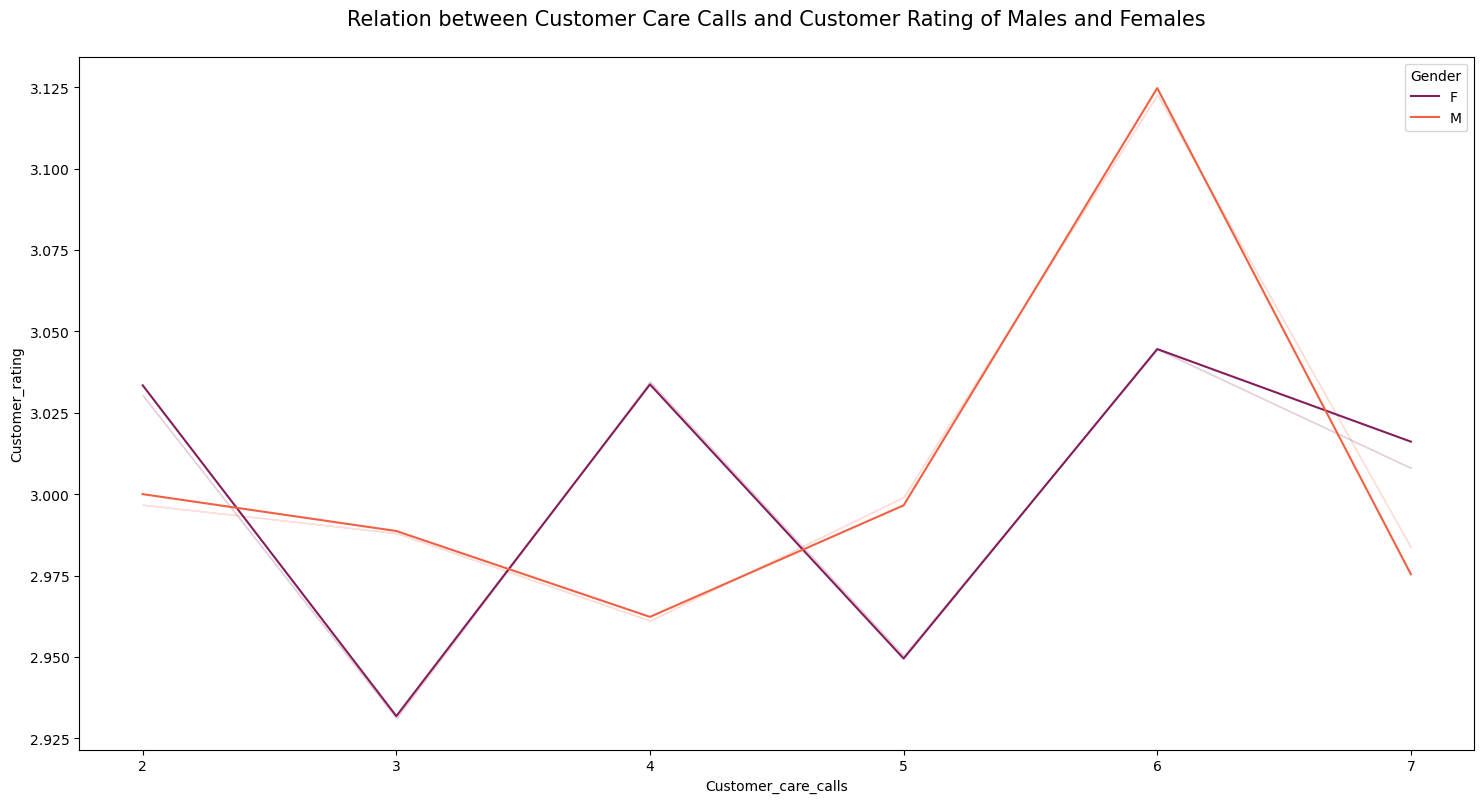

In [ ]:
# making a lineplot to check the relation between customer care calls, customer ratings and gender

plt.figure(figsize = (18, 9))
sns.lineplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Gender', data = df,
             palette = 'rocket', ci = 0)
plt.title('Relation between Customer Care Calls and Customer Rating of Males and Females\n',
          fontsize = 15)
plt.show()

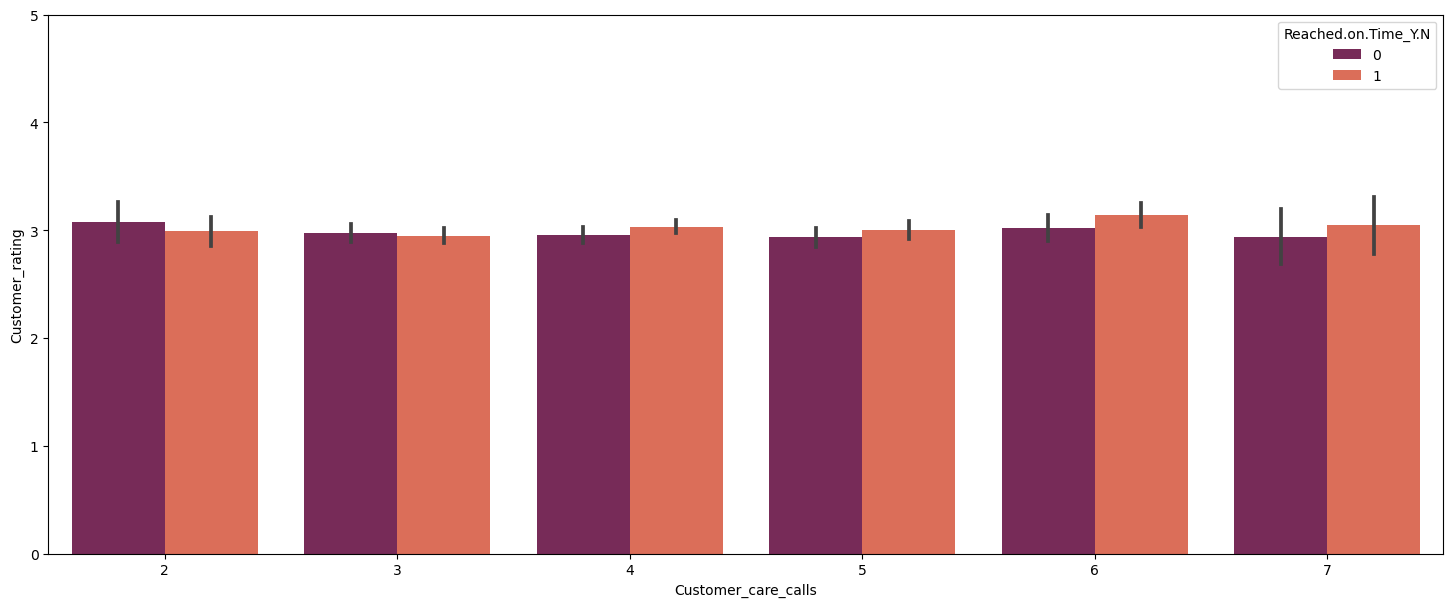

In [ ]:
# checking the relation between customer care calls, customer ratings and whether or not the product will reach on time.

plt.figure(figsize = (18, 7))
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N', data = df, palette = 'rocket')
plt.ylim(0, 5)
plt.show()

- Customers calls were more when the product doesn't reach on time and when the product reaches at time then the calls were less.

In [ ]:
from scipy.stats import spearmanr
# create a subset dataframe containing only the relevant columns
subset = df[['Customer_care_calls', 'Customer_rating', 'Gender']]

# create separate dataframes for males and females
male_df = subset[subset['Gender'] == 'M']
female_df = subset[subset['Gender'] == 'F']

# perform the Spearman correlation test on the male dataframe
male_corr, male_pval = stats.spearmanr(male_df['Customer_care_calls'], male_df['Customer_rating'])
print("Male correlation: ", male_corr)
print("Male p-value: ", male_pval)

# perform the Spearman correlation test on the female dataframe
female_corr, female_pval = stats.spearmanr(female_df['Customer_care_calls'], female_df['Customer_rating'])
print("Female correlation: ", female_corr)
print("Female p-value: ", female_pval)

# test the null hypothesis and print the result
if male_pval < 0.05:
    print("There is a significant Relation between Customer Care Calls and Customer Rating of Males.")
else:
    print("There is no significant Relation between Customer Care Calls and Customer Rating of Males.")
    
if female_pval < 0.05:
    print("There is a significant Relation between Customer Care Calls and Customer Rating of Females.")
else:
    print("There is no significant Relation between Customer Care Calls and Customer Rating of Females.")

Male correlation:  0.013389502088242689
Male p-value:  0.32283515768156157
Female correlation:  0.010318790565704504
Female p-value:  0.44234850621310196
There is no significant Relation between Customer Care Calls and Customer Rating of Males.
There is no significant Relation between Customer Care Calls and Customer Rating of Females.


### Relation Between Customer Care Calls, Product importance and Prior Purchases

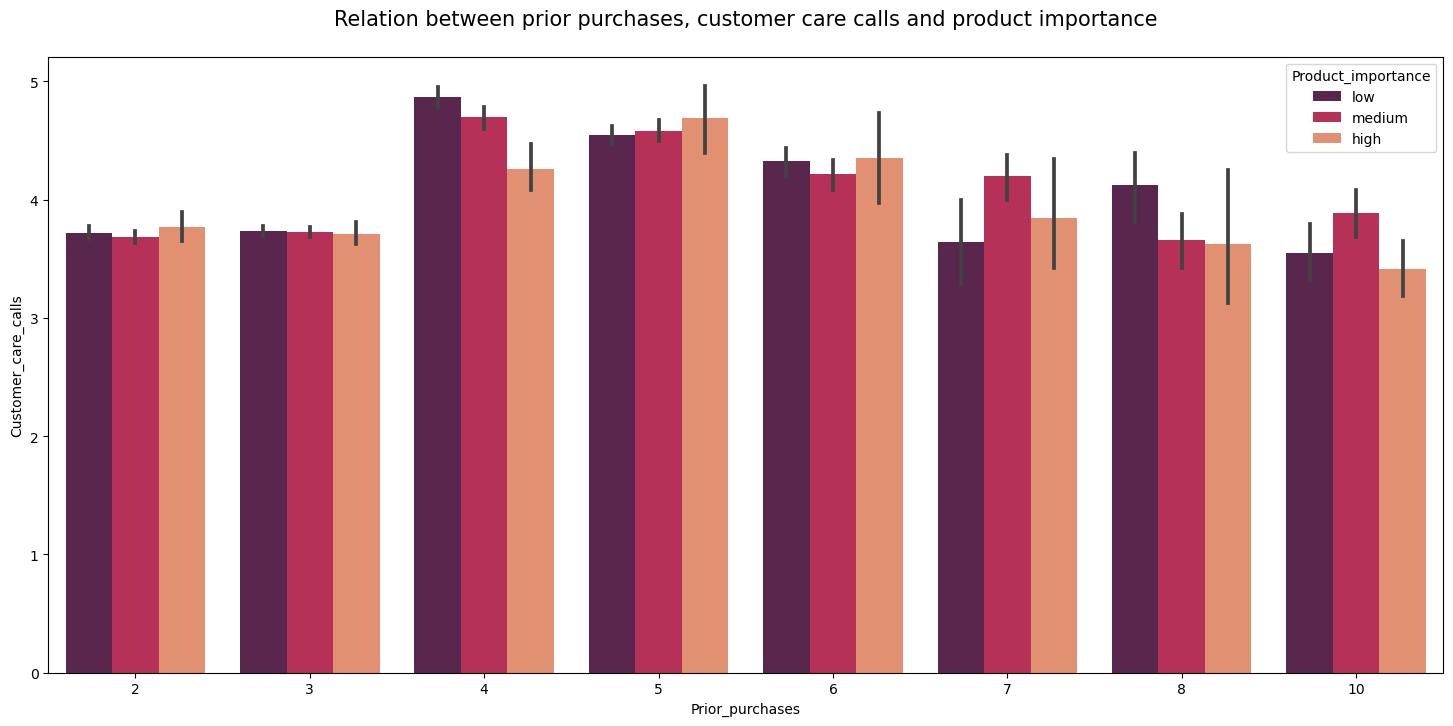

In [ ]:
# making a barplot to check the relation between prior purchases, customer care calls and product importance

plt.figure(figsize = (18, 8))
sns.barplot(x = 'Prior_purchases', y = 'Customer_care_calls', data = df, hue = 'Product_importance',
            palette = 'rocket')
plt.title('Relation between prior purchases, customer care calls and product importance\n',
          fontsize = 15)
plt.show()

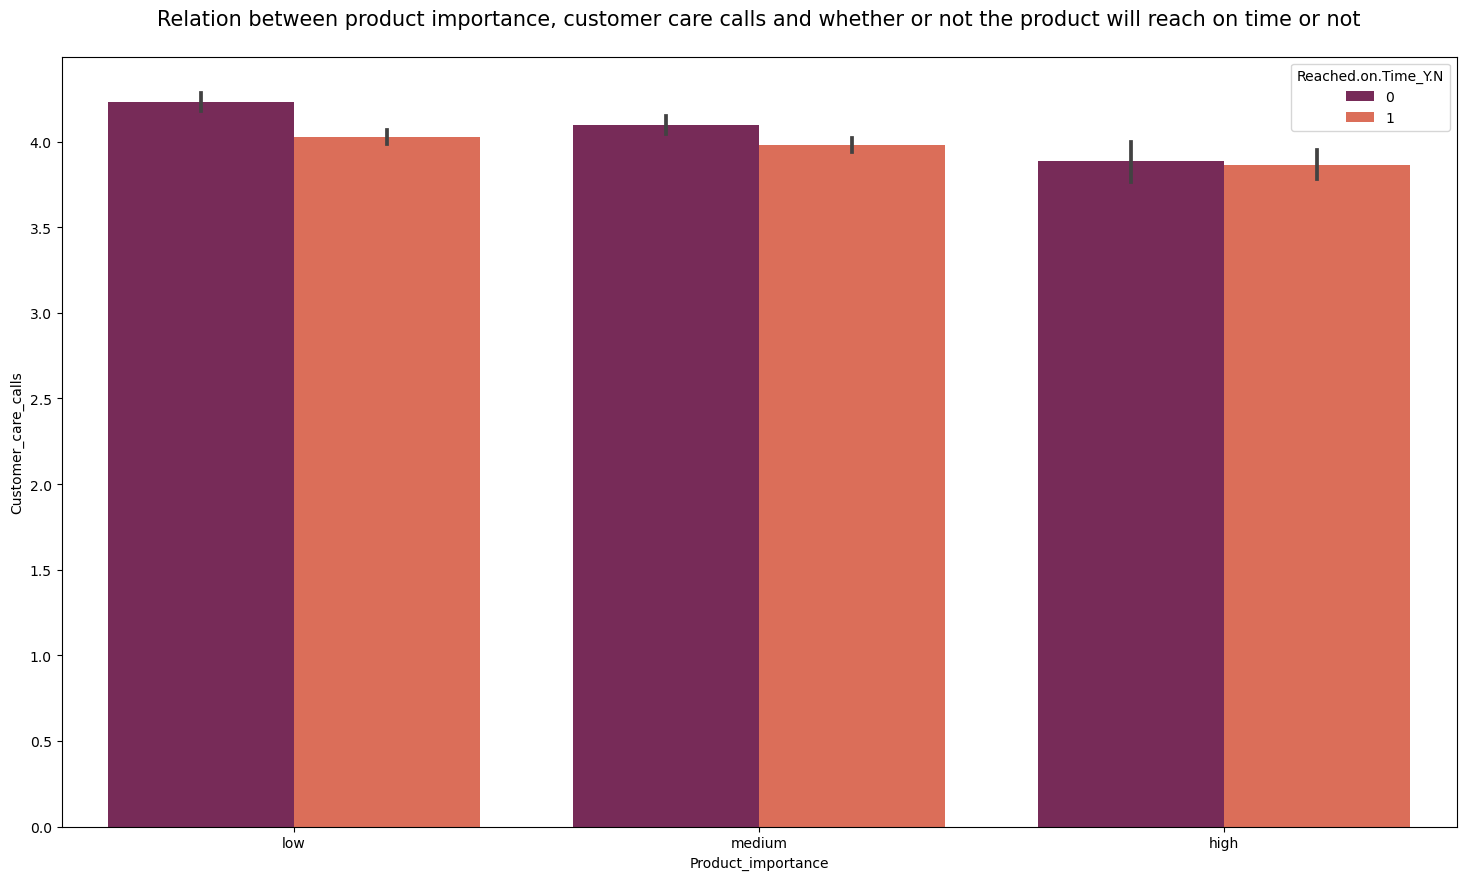

In [ ]:
# making a barplot to check the relation between product importance, customer care calls and whether or not the product will reach on time or not

plt.figure(figsize = (18, 10))
sns.barplot('Product_importance', y = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df, palette = 'rocket')
plt.title('Relation between product importance, customer care calls and whether or not the product will reach on time or not\n',
          fontsize = 15)
plt.show()

- Customer_care_calls were more when product importance is low.
- When importance of product is low or medium then more of the products weren't reached on time but when importance of product is high then products reached on time or not reached on time are almost equal.

In [ ]:
# create contingency table
table = pd.crosstab(df['Customer_care_calls'], [df['Product_importance'], df['Prior_purchases']])

# perform chi-squared test
chi2, pval, dof, expected = chi2_contingency(table)

# interpretation
alpha = 0.05
if pvalue < alpha:
    print("Reject the null hypothesis.")
    print('There is no association between Customer Care Calls, Product importance and Prior Purchases')
else:
    print("Fail to reject the null hypothesis.")
    print('There is association between Customer Care Calls, Product importance and Prior Purchases')


Fail to reject the null hypothesis.
There is association between Customer Care Calls, Product importance and Prior Purchases


### Relation between cost of the products and customer care calls

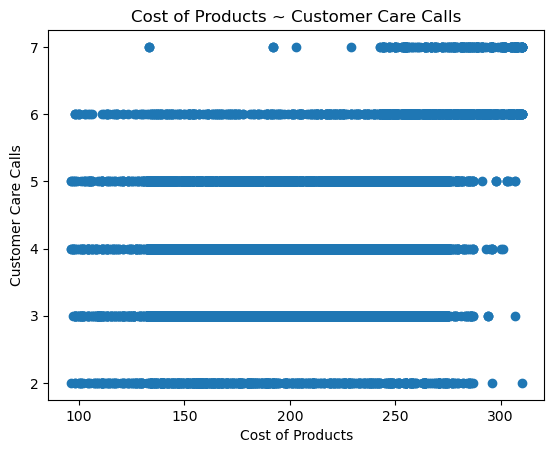

In [ ]:
# create scatter plot
plt.scatter(df['Cost_of_the_Product'], df['Customer_care_calls'])

# add title and axis labels
plt.title('Cost of Products ~ Customer Care Calls')
plt.xlabel('Cost of Products')
plt.ylabel('Customer Care Calls')

# display plot
plt.show()


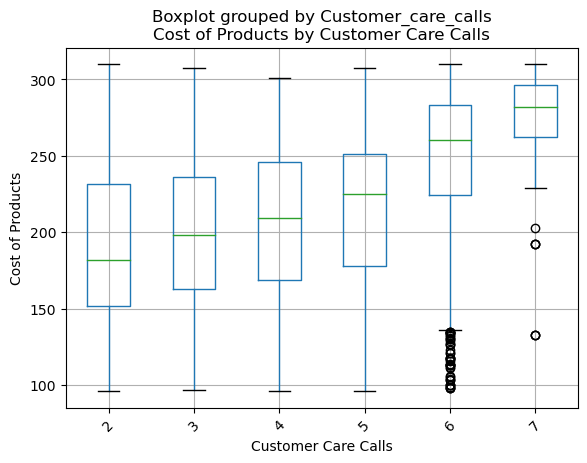

In [83]:
# reverse order of 'Customer_care_calls' column
df['Customer_care_calls'] = df['Customer_care_calls'][::-1]

# create box plot
df.boxplot(column='Cost_of_the_Product', by='Customer_care_calls')

# set x-axis tick labels and rotation
plt.xticks(rotation=45)

# add title and axis labels
plt.title('Cost of Products by Customer Care Calls')
plt.xlabel('Customer Care Calls')
plt.ylabel('Cost of Products')

# display plot
plt.show()

- Customer calls were more when the cost of product is high.

### Relation between cost of the product and the discount offered and the relation with whether or not the product will reach on time

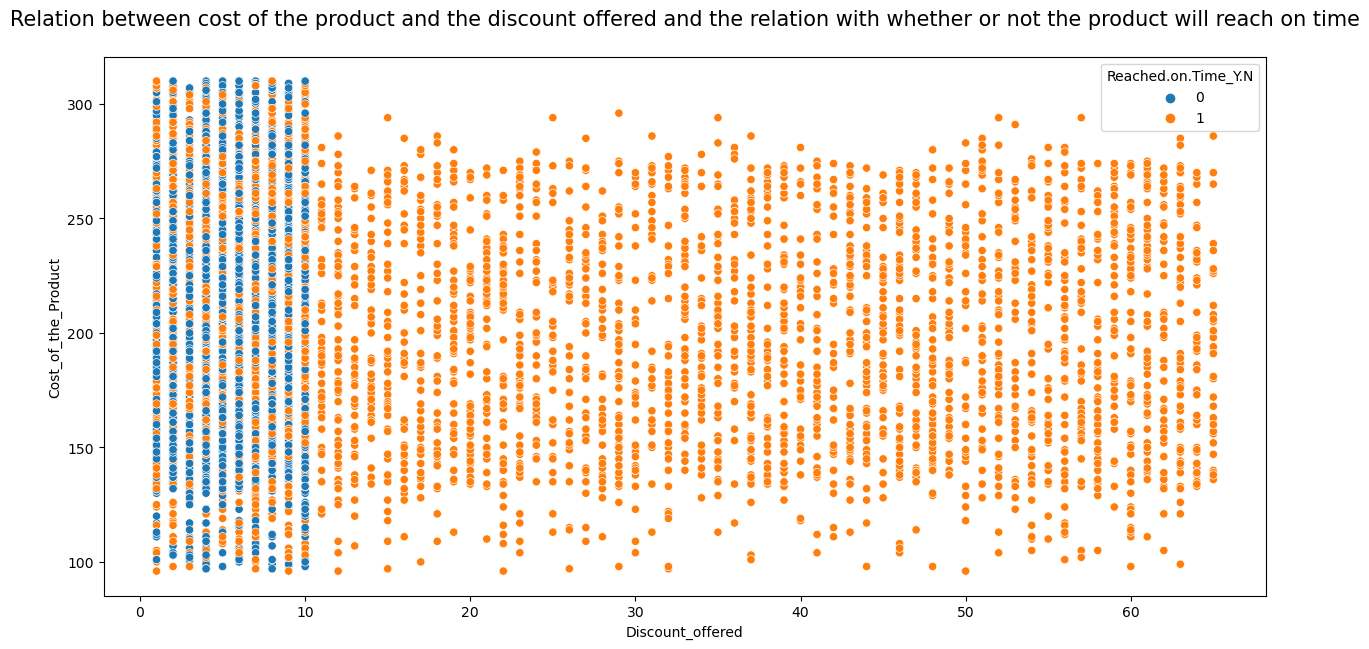

In [ ]:
# creating scatter plot to see the relation between cost of the product and the discount offered and the relation with
# whether or not the product will reach on time

plt.figure(figsize = (15, 7))
sns.scatterplot(x='Discount_offered', y='Cost_of_the_Product', data=df, hue='Reached.on.Time_Y.N')
plt.title('Relation between cost of the product and the discount offered and the relation with whether or not the product will reach on time\n',
          fontsize = 15)
plt.show()

- Only goods with under 10% discount offered reached on time, but not all goods with under 10% discount reached on time

- The outliers are not removed because it still make sense for the discount offered and are also used to determine the relation cost of the product and the discount offered and the relation with whether or not the product will reach on time

In [ ]:
# Create a new column for cost and discount ratio
df['Cost_Discount_Ratio'] = df['Cost_of_the_Product'] / df['Discount_offered']

# Create a contingency table
contingency_table = pd.crosstab(df['Cost_Discount_Ratio'], df['Reached.on.Time_Y.N'])

# Calculate the chi-square test statistic and p-value
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Interpretasi hasil chi-square
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print('There is no association between the cost of the product, the discount offered, and whether the product will arrive on time')
else:
    print("Fail to reject the null hypothesis.")
    print('There is association between the cost of the product, the discount offered, and whether the product will arrive on time')

Reject the null hypothesis.
There is no association between the cost of the product, the discount offered, and whether the product will arrive on time


# ***Summary:***

- ***Warehouse_block*** E has more value than all other Warehouse blocks.
- In column ***Mode_of_Shipment*** we can clearly see that ships deliver most of the products to customers.
- Most of the ***customers call*** 3 or 4 times to the customer service center.
- ***Customer_rating*** doesn't have much variety.
- Most customers have 3 ***previous purchases***.
- We can say that most of the products are 'low' ***product importance***.
- The ***Gender*** column doesn't have much variation.
- More products do not arrive on time than products that do arrive on time.
- ***Customer_care_calls*** were more when product importance is low.
- When ***importance of product*** is low or medium then more of the products weren't reached on time but when importance of product is high then products reached on time or not reached on time are almost equal.
- Customer calls were more when the ***cost of product*** is high.
- Products with **high importance** and **shipped by ship** produces **most late delivery**. 
- Products that are not arrive on time have lower cost than products that arrive on time. Also, products which have **discounts more than 10%** are not arrive on time.
- Products that are arrive on time have more calls from customers, this means that employees will work if triggered by customers who asked their products.

**The recommendation** for this problem is:
- Create a new Standard Operational Procedure (SOP), so that their performance remains good even though they are not triggered by customer calls.
- Pay more attention to the factors that usually have a large number of late deliveries such as products from block E, high importance products, etc.


`